In [1]:
# External Imports
import folium
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import norm

# Core Imports
import json
import os.path as path
import sys
from collections import namedtuple

# Internal Imports
sys.path.append("/driptorch")
import driptorch as dt

from driptorch.firing import flank
print(flank.__file__)


# Define burn unit spatial data in GeoJSON format
geojson_1 = json.loads('{"type": "FeatureCollection", "features": [{"id": "8", "type": "Feature", "properties": {"Acres": 84, "FACTSsize": 83.951, "FY_Schedul": "FY23", "Project_Na": "Mountain Top RX", "Treatment": "RX", "Type_Thinn": null, "Unit_Name": "Inspiration", "Unit_No": 9}, "geometry": {"type": "Polygon", "coordinates": [[[-110.7558113510971, 32.42810001039591, 0.0], [-110.7557335453154, 32.42835387672473, 0.0], [-110.75566047455358, 32.42836702299154, 0.0], [-110.75562599721297, 32.42848286140046, 0.0], [-110.75560849713291, 32.42863736570989, 0.0], [-110.75560830489343, 32.4287088396631, 0.0], [-110.75560817194277, 32.428758075405796, 0.0], [-110.7556081198405, 32.428777415601566, 0.0], [-110.75566676365888, 32.42890423871676, 0.0], [-110.75569551064626, 32.4289870851369, 0.0], [-110.7556918392317, 32.429010788132544, 0.0], [-110.75568620769319, 32.42904713837515, 0.0], [-110.75568601545372, 32.429048388694035, 0.0], [-110.75564066220996, 32.42911934066066, 0.0], [-110.75559674537237, 32.42928558653502, 0.0], [-110.75554739282897, 32.42942395746727, 0.0], [-110.75551906265986, 32.429550499888514, 0.0], [-110.75554181518936, 32.42976220042115, 0.0], [-110.7556001086648, 32.4298844637238, 0.0], [-110.75563343256857, 32.42995436186377, 0.0], [-110.75564270318229, 32.42997380567921, 0.0], [-110.75577651173546, 32.430083994044836, 0.0], [-110.7558517591152, 32.43018961021562, 0.0], [-110.75587962575365, 32.43022956303809, 0.0], [-110.75591147642035, 32.43031122162969, 0.0], [-110.75592883726152, 32.43045049174969, 0.0], [-110.75593948229766, 32.43073780236836, 0.0], [-110.75599382228751, 32.43085844707932, 0.0], [-110.75611361173232, 32.43103485433625, 0.0], [-110.75626983055689, 32.43121751117592, 0.0], [-110.75637152344031, 32.43134752064577, 0.0], [-110.7565278922835, 32.431474544862816, 0.0], [-110.7566444019792, 32.43155971358563, 0.0], [-110.75688051876175, 32.4318028476352, 0.0], [-110.75696747927451, 32.43199155262757, 0.0], [-110.75702535772825, 32.43241250412081, 0.0], [-110.7570864907783, 32.43261707011038, 0.0], [-110.75716937114305, 32.43281099661748, 0.0], [-110.75729396837126, 32.43299917786161, 0.0], [-110.75729641268717, 32.43300286951459, 0.0], [-110.75730392709451, 32.43301469811866, 0.0], [-110.75734359220588, 32.433077139262586, 0.0], [-110.75733613798566, 32.433138939689194, 0.0], [-110.75729577578161, 32.433240857606116, 0.0], [-110.75722614107575, 32.43338598933373, 0.0], [-110.75721119310941, 32.433413555677, 0.0], [-110.75720922669724, 32.43341718059214, 0.0], [-110.75716754037647, 32.4334940536274, 0.0], [-110.75716187739694, 32.4335083508371, 0.0], [-110.7562883062073, 32.43385351134338, 0.0], [-110.75562710663233, 32.43405576917699, 0.0], [-110.75465254594016, 32.43453314029489, 0.0], [-110.75405354661378, 32.435303150873615, 0.0], [-110.75328965433046, 32.435610330645616, 0.0], [-110.7524146233785, 32.43560207337899, 0.0], [-110.75231674923336, 32.435604604161945, 0.0], [-110.7522757438356, 32.43508632669509, 0.0], [-110.75248033693813, 32.43459142403397, 0.0], [-110.75247791957172, 32.43458487030905, 0.0], [-110.75245751523838, 32.43456681799398, 0.0], [-110.75242164101752, 32.43448594418446, 0.0], [-110.75238960619615, 32.43434552937377, 0.0], [-110.75238582069555, 32.43432893803163, 0.0], [-110.75232938134286, 32.434182020778906, 0.0], [-110.75232888008296, 32.434180950221084, 0.0], [-110.75228070343425, 32.43407811899417, 0.0], [-110.75225272899799, 32.43402996733035, 0.0], [-110.75222876104789, 32.43398871059382, 0.0], [-110.75220470326626, 32.43395060941398, 0.0], [-110.7521171435772, 32.43384635859613, 0.0], [-110.75199340603672, 32.4337442283125, 0.0], [-110.75186710560271, 32.43363442123986, 0.0], [-110.75178725076385, 32.43354661748931, 0.0], [-110.75172421777698, 32.43344898824947, 0.0], [-110.7516186827991, 32.433304164449495, 0.0], [-110.75151310021046, 32.433176870618354, 0.0], [-110.75138735044376, 32.433083371622594, 0.0], [-110.7513054977517, 32.43303732341873, 0.0], [-110.75116360615765, 32.432960352186875, 0.0], [-110.75110883407812, 32.432939663299656, 0.0], [-110.7510949919379, 32.43293443402287, 0.0], [-110.75106428572488, 32.43290537843592, 0.0], [-110.75068253945837, 32.43271380633581, 0.0], [-110.75056452777949, 32.43264339930906, 0.0], [-110.75053167818618, 32.432614692399746, 0.0], [-110.75049717299778, 32.43257380804942, 0.0], [-110.75047732831486, 32.43252791046701, 0.0], [-110.75047535202124, 32.43248416387369, 0.0], [-110.75047404856576, 32.432445797446334, 0.0], [-110.75047734628117, 32.4323440522588, 0.0], [-110.75047608594483, 32.432284594129534, 0.0], [-110.75047296250258, 32.43222635439141, 0.0], [-110.75046923898574, 32.432156928856195, 0.0], [-110.75047696090388, 32.43209466676915, 0.0], [-110.75050807225713, 32.432039831999916, 0.0], [-110.75055750834386, 32.43197309718693, 0.0], [-110.75058584659782, 32.43191976510481, 0.0], [-110.7505986413024, 32.43185503034769, 0.0], [-110.75058755160023, 32.43179414343689, 0.0], [-110.75054873809175, 32.43171418305355, 0.0], [-110.75050839834557, 32.43165178039253, 0.0], [-110.75045007432745, 32.43158626145677, 0.0], [-110.75037138640015, 32.43152695901858, 0.0], [-110.7522157435611, 32.42946759029503, 0.0], [-110.7532297187347, 32.42848324734121, 0.0], [-110.75340277558092, 32.42816342245212, 0.0], [-110.75363189538571, 32.4279398130744, 0.0], [-110.75407969926664, 32.42721880028716, 0.0], [-110.75412635416926, 32.42713506130516, 0.0], [-110.75414726425412, 32.42709753197921, 0.0], [-110.75418551272226, 32.42711965301465, 0.0], [-110.75424375948529, 32.42715341233996, 0.0], [-110.75429972183252, 32.427169354428756, 0.0], [-110.75436030241866, 32.427203119043064, 0.0], [-110.75440694654147, 32.42721310511681, 0.0], [-110.7544395841324, 32.42722504366747, 0.0], [-110.75445817746215, 32.42725278780668, 0.0], [-110.75450242398148, 32.427286520543575, 0.0], [-110.75452338796524, 32.42730041535213, 0.0], [-110.75457230662238, 32.42733217663952, 0.0], [-110.7546445832735, 32.42735606735602, 0.0], [-110.75468890435299, 32.427362091594674, 0.0], [-110.75474721130313, 32.42737407941138, 0.0], [-110.754786800956, 32.4274038442207, 0.0], [-110.75485211386705, 32.427413866667834, 0.0], [-110.75490577473056, 32.42741792932991, 0.0], [-110.75495464577695, 32.427467503953224, 0.0], [-110.75501519582036, 32.42751314175968, 0.0], [-110.75505941539024, 32.427556769446035, 0.0], [-110.75512913992766, 32.427614015871775, 0.0], [-110.75518747742052, 32.427661913918186, 0.0], [-110.75529231710236, 32.42772545063377, 0.0], [-110.75536694913616, 32.42774142825866, 0.0], [-110.75544623623975, 32.42776137374745, 0.0], [-110.75554413913102, 32.42780114718474, 0.0], [-110.75565832847833, 32.427858763475825, 0.0], [-110.75569785614749, 32.4279122784202, 0.0], [-110.75576764985519, 32.42799157947523, 0.0], [-110.7557978314521, 32.42804903338194, 0.0], [-110.7558113510971, 32.42810001039591, 0.0]]]}}]}')


/Users/franklyndunbar/Project/Silvx/DripTorch/driptorch/firing/flank.py


In [2]:

burn_unit = dt.BurnUnit.from_json(geojson_1, firing_direction=0)
#projector = dt.io.Projector(src_epsg=burn_unit.utm_epsg,dst_epsg=4326)
#burn_unit_lat = projector.forward(burn_unit.polygon)
bounds = burn_unit.bounds
firing_area = burn_unit.buffer_control_line(5)
firing_area = firing_area.buffer_downwind(20)
blackline_area = burn_unit.difference(firing_area)
dash_igniter = dt.Igniter(5,dash_length=.5)
point_crew = dt.IgnitionCrew.clone_igniter(dash_igniter, 7)


/Users/franklyndunbar/Project/Silvx/DripTorch/driptorch/personnel.py:56: IgniterWarning: Igniter velocity is above reasonable rates
  warnings.warn(IgniterWarning(IgniterWarning.velocity_warning))


In [3]:
technique = dt.firing.Strip(firing_area, point_crew)

pattern = technique.generate_pattern(spacing=5,depth=5,heat_depth=10)
map = dt.Map(burn_unit)
map.add_firing_area(firing_area)
map.add_blackline_area(blackline_area)
map.add_pattern(pattern)
map.show()


(1886, 1310)


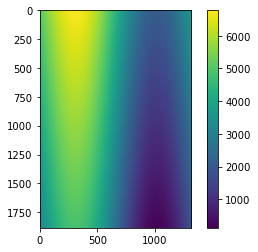

In [4]:
# Generate Pseudo DEM
xspan = np.max(bounds[:,0]) - np.min(bounds[:,0])
yspan = np.max(bounds[:,1]) - np.min(bounds[:,1])
dem = np.zeros((2*int(yspan),2*int(xspan)))
for i in range(dem.shape[0]):
    for j in range(dem.shape[1]):
        dem[i,j] = 5000 - i - j + 2000*np.sin(2*np.pi*j/dem.shape[1]) + np.random.randint(100)
        
print(dem.shape)
plt.imshow(dem)
plt.colorbar()
plt.show()

In [5]:
bounds

array([[ 522811.83615989, 3587804.42306106],
       [ 523467.68808476, 3587804.42306106],
       [ 523467.68808476, 3588748.25662288],
       [ 522811.83615989, 3588748.25662288]])

In [6]:
# Compute Affine Transformation Matrix
X1 = [0,0]
x1 = [np.min(bounds[:,0]),np.max(bounds[:,1])]

X2 = [0,dem.shape[1]-1]
x2 = [np.max(bounds[:,0]),np.max(bounds[:,1])]

X3 = [dem.shape[0]-1,0]
x3 = [np.min(bounds[:,0]),np.min(bounds[:,1])]

A = np.zeros((6,6))
A[0:3,2] = 1
A[3:,-1] = 1
A[0,0:2] = x1
A[3,3:-1] = x1
A[1,0:2] = x2
A[4,3:-1] = x2
A[2,0:2] = x3
A[5,3:-1] = x3

B = np.array([X1[0],X2[0],X3[0],X1[1],X2[1],X3[1]]).T

coefs = np.linalg.solve(A,B)
transform = np.array([
    coefs[:3],coefs[3:]
])
#transform[-1,-1] *= -1

def index(location) -> np.ndarray:
    # Map from spatial coordinates to pesudo raster
    #append 1
    point = [location[0],location[1],1]
    index = transform@point
  
    return index.astype(int)

def sampleDEM(location) -> float:
    try:
        ind = index(location)
        
        return dem[ind[0],ind[1]]
    except:
        return np.NaN

In [7]:

raw_paths = technique.raw_paths(paths=dt.Pattern.empty_path_dict(),spacing=5,depth=5,heat_depth=10,side='left')
raw_paths.keys()

dict_keys(['heat', 'igniter', 'leg', 'geometry'])

In [8]:
import pdb
def get_arc(start,end,spacing):
    # Get the local arc points from r,theta and real world coords along arc

    r = np.linalg.norm((start-end))
   
    theta = np.rad2deg(np.arctan(start/end)) % 360
    theta = theta[0]
  
   
    local_theta_start = np.rad2deg(np.arcsin((spacing/2*r)%1))
    theta_range = np.linspace(-1*local_theta_start,local_theta_start,100)[::-1]
    
    # put span of angles back into igniter frame of ref
    theta_range_global = theta_range + theta
    theta_range_global = [np.deg2rad(x) for x in theta_range_global]
    
    x_y_global = [[r*np.cos(x),r*np.sin(x)] for x in theta_range_global]
    
    return theta_range_global, x_y_global


In [110]:
from shapely.ops import unary_union
from shapely.geometry import LineString,Point
import matplotlib.pyplot as plt
igniter_spacing = 5
var_dem = 2
var_path = igniter_spacing
posteriors = {}
augmented_paths = {}
Posterior = namedtuple("Posterior","mean var")
delta_distance = 1
igniters = np.unique(raw_paths["igniter"]).shape[0]
for heat in np.unique(raw_paths["heat"]):
    for igniter in np.unique(raw_paths["igniter"]):
        pointindex = heat*igniters + igniter
        try:
            geometry = raw_paths["geometry"][pointindex]
            points = [p for p in geometry.coords]
            distances = np.arange(0,geometry.length,delta_distance)
            points = unary_union([geometry.interpolate(distance) for distance in distances.tolist()] + [geometry.boundary[1]])
            points = np.array([list(x.coords)[0] for x in points])
           
            #print(f"\n Heat: {heat} Igniter: {igniter} Index: {pointindex}")#\n Points: \n {points}\n Geometry: {geometry}")
            for i in range(points.shape[1]-1):
                start = points[i]
                stop = points[i+1]
                # Get prior mean
                if igniter == 0:
                    prior_mean = np.rad2deg(np.arctan(start/stop)) % 360
                    prior_mean = prior_mean[0]
                    prior_var = var_dem
                else:
                    prior_mean = posteriors[heat,igniter-1,i].mean
                    prior_var = posteriors[heat,igniter-1,i].var
                # Get points along arc, range of thetas, and sample from DEM
                thetas,arc_points = get_arc(start,stop,igniter_spacing)
                sampled_elevs = [sampleDEM(x+start) for x in arc_points]
                start_elev = sampleDEM(start)
                change_elv = [(x - start_elev) + 1e-5 for x in sampled_elevs]
                weights = [1/x for x in change_elv] # Generate weights by their inverse of change in elevation
                weights_sum = np.sum(weights)
                weights = [x/weights_sum for x in weights] # Normalize weights
                #weights = [x[0] for x in weights]

                # get likelihood mean
                lh_mean = np.rad2deg(np.average(thetas,weights=weights))

                # Compute posterior
                # https://stats.stackexchange.com/questions/538622/product-of-two-normal-distributions-for-bayes-rule-is-not-product-of-normal-ou
                post_mean = (lh_mean*var_path + prior_mean*prior_var)/(prior_var + var_path)
                post_var = 1 / (1/var_path + 1/var_dem)
                posterior = Posterior(post_mean,post_var)
                posteriors[heat,igniter,i] = posterior
                r = np.linalg.norm((start-stop))
                new_stop = r*np.array([np.cos(np.rad2deg(post_mean)),np.sin(np.rad2deg(post_mean))]) + start
                
                
               
                points[i+1] = new_stop
                # print(f"{stop - new_stop}")
                print(f"{points[i+1]} - {stop} = {points[i+1] - stop}")
                # print(f"{points[i+1]} - {new_stop} = {points[i+1] - new_stop}\n\n")
          
            pointset = LineString(points.tolist())
          
            augmented_paths[heat,igniter] = pointset
        except Exception as e:
            print(e)
            break



           

[ 522652.48404653 3588643.01801152] - [ 522652.48404653 3588643.01801152] = [0. 0.]
[ 522653.02659721 3588638.72063918] - [ 522653.02659721 3588638.72063918] = [0. 0.]
[ 522652.53398682 3588633.18771259] - [ 522652.53398682 3588633.18771259] = [0. 0.]
[ 522652.46467771 3588627.83569241] - [ 522652.46467771 3588627.83569241] = [0. 0.]
[ 522653.98211122 3588623.67731925] - [ 522653.98211122 3588623.67731925] = [0. 0.]
[ 522653.01000282 3588613.71236319] - [ 522653.01000282 3588613.71236319] = [0. 0.]
[ 522654.45538773 3588607.68638379] - [ 522654.45538773 3588607.68638379] = [0. 0.]
[ 522653.20277976 3588601.85653312] - [ 522653.20277976 3588601.85653312] = [0. 0.]
[ 522653.5218272  3588598.82001541] - [ 522653.5218272  3588598.82001541] = [0. 0.]
[ 522654.45215487 3588592.66451133] - [ 522654.45215487 3588592.66451133] = [0. 0.]
[ 522652.48379686 3588587.62655021] - [ 522652.48379686 3588587.62655021] = [0. 0.]
[ 522652.4890563  3588583.04155338] - [ 522652.4890563  3588583.04155338] = 

In [108]:
path = augmented_paths[0,0]
path = list(path.coords)
print(posteriors[0,0,0])

Posterior(mean=-0.6065919647161147, var=1.4285714285714286)


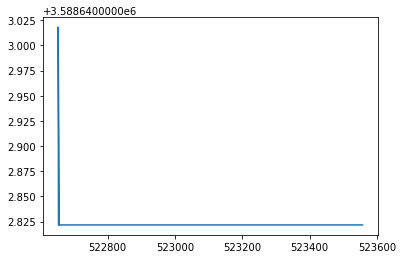

In [109]:
import matplotlib.pyplot as plt
#plt.imshow(dem)
dem_inds = np.array([p for p in path])
plt.plot(dem_inds[:,0],dem_inds[:,1])
plt.show()